## Previsão de Vendas - Celulares


In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


Existem 3980 diferentes produtos na base de dados, que compreendem os números de vendas de vários produtos de categorias distintas, porém, como para este caso queremos apenas dos celulares, então é feita uma filtragem.

In [3]:
df = df[[x for x in df.columns if "CELULAR" in x]]
              
df.head()

,CELULAR ALCATEL 1050E DB BRANCO,CELULAR BLU ARIA II T179 DB BRANCO,CELULAR BLU ARIA II T179 DB PRETO VERMELHO,CELULAR BLU ARIA II T179 DB VERDE,CELULAR BLU DIVA FLEX T370 FLIP DB DOURADO,CELULAR BLU DIVA FLEX T370 FLIP DB PRETO,CELULAR BLU DIVA FLEX T370 FLIP DB ROSA,CELULAR BLU JENNY 2.8 T276 DB PRETO-AZUL,CELULAR BLU JENNY 2.8 T276 DB PRETO-VERMEL,CELULAR BLU JENNY II T177 DB PRETO VER,...,CELULAR RIU FLIP 2.4 DB VERMELHO,CELULAR RIU-I R200 DB BRANCO-AZUL,CELULAR RIU-I R200 DB BRANCO-ROSA,CELULAR RIU-I R200 DB PRETO-AMARELO,CELULAR RIU-I R200 DB PRETO-AZUL,CELULAR RIU-I R200 DB PRETO-VERMELHO,CELULAR SAMSUNG E1182L DB PRATA,CELULAR YEZZ CLASSIC C50 DB PRETO,GE1 CELULAR,GE2 CELULAR
2015-01-02,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
2015-01-03,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
2015-01-05,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
2015-01-06,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0
2015-01-07,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0


Restaram assim 99 produtos diferentes, nota-se uma presença de vários NaN, que serão substituídos por 0.

In [4]:
df.fillna(value=0, inplace=True)

Ajustar a granularidade, os dados vão desde de 2015-01-01 (quinta) até 2019-05-30 (quarta), ajustar a granularidade para ser feita a medição de vendas com base na soma de vendas de um item por semana, esta iniciando na quinta.

In [5]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,CELULAR ALCATEL 1050E DB BRANCO,CELULAR BLU ARIA II T179 DB BRANCO,CELULAR BLU ARIA II T179 DB PRETO VERMELHO,CELULAR BLU ARIA II T179 DB VERDE,CELULAR BLU DIVA FLEX T370 FLIP DB DOURADO,CELULAR BLU DIVA FLEX T370 FLIP DB PRETO,CELULAR BLU DIVA FLEX T370 FLIP DB ROSA,CELULAR BLU JENNY 2.8 T276 DB PRETO-AZUL,CELULAR BLU JENNY 2.8 T276 DB PRETO-VERMEL,CELULAR BLU JENNY II T177 DB PRETO VER,...,CELULAR RIU FLIP 2.4 DB VERMELHO,CELULAR RIU-I R200 DB BRANCO-AZUL,CELULAR RIU-I R200 DB BRANCO-ROSA,CELULAR RIU-I R200 DB PRETO-AMARELO,CELULAR RIU-I R200 DB PRETO-AZUL,CELULAR RIU-I R200 DB PRETO-VERMELHO,CELULAR SAMSUNG E1182L DB PRATA,CELULAR YEZZ CLASSIC C50 DB PRETO,GE1 CELULAR,GE2 CELULAR
2015-01-08,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
2015-01-15,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2.0
2015-01-22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0
2015-01-29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0
2015-02-05,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0


Uma análise do comportamento de diferentes celulares vendidos no período, iniciando pela correlação.

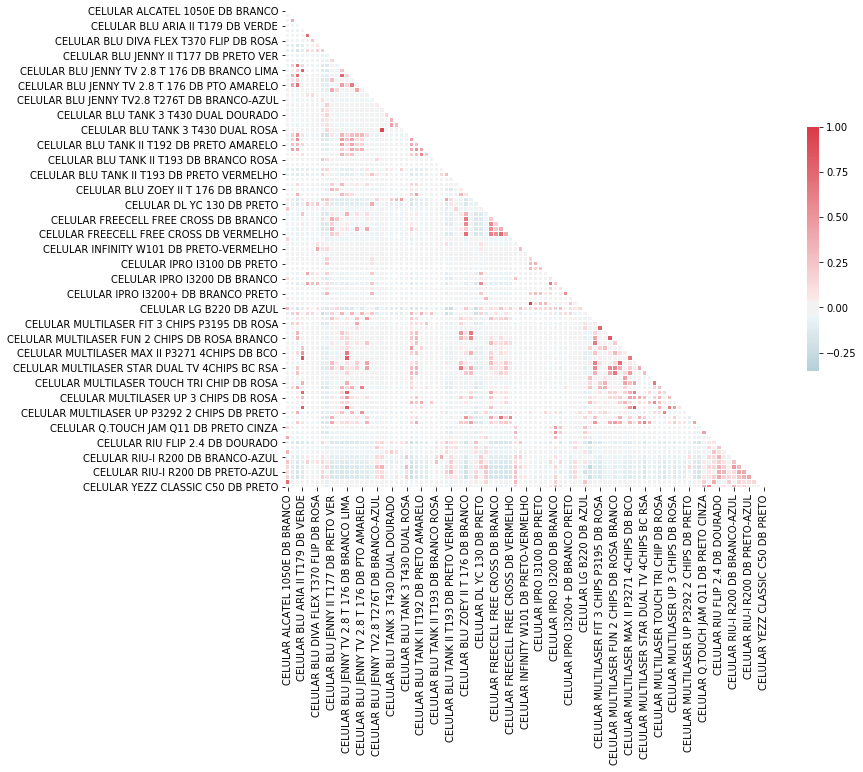

In [6]:
import seaborn as sns

corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Percebe-se que existem alguns pares com um vermelho mais intenso, o que indica uma forte correlação.

In [7]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

#so.columns = ["Aparelho 1", ]
print(so[:20])

CELULAR IPRO I3100 DB BRANCO PRETO             CELULAR IPRO I3200+ DB PRETO VERMELHO            1.000000
CELULAR BLU TANK 2 T193 DUAL BRANCO AZUL       CELULAR BLU TANK 3 T430 DUAL ROSA                0.925146
CELULAR MULTILASER MAX II P3297 4CHIPS DB PTO  CELULAR MULTILASER UP P3269 2 CHIPS DB BRANCO    0.854890
CELULAR BLU ARIA II T179 DB VERDE              CELULAR MULTILASER MAX II P3297 4CHIPS DB PTO    0.853745
CELULAR MULTILASER FUN 2 CHIPS DB CINZA PRETO  CELULAR MULTILASER FUN 2 CHIPS DB ROSA BRANCO    0.831796
CELULAR BLU ARIA II T179 DB VERDE              CELULAR MULTILASER UP P3269 2 CHIPS DB BRANCO    0.802636
CELULAR BLU JENNY TV 2.8 T 176 DB BRANCO LIMA  CELULAR MULTILASER UP P3269 2 CHIPS DB BRANCO    0.801677
                                               CELULAR MULTILASER MAX II P3297 4CHIPS DB PTO    0.796993
CELULAR BLU ARIA II T179 DB VERDE              CELULAR BLU JENNY TV 2.8 T 176 DB BRANCO LIMA    0.782513
CELULAR BLU JENNY TV 2.8 T 176 DB BRANCO LIMA  CELULAR 

Percebe-se uma correlação forte (p >=0.7) em 19 pares distintos de aparelhos, sendo que entre CELULAR IPRO I3100 DB BRANCO PRETO eCELULAR IPRO I3200+ DB PRETO VERMELHO há uma correlação forte no maior nível possível (p = 1).

/Users/david/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


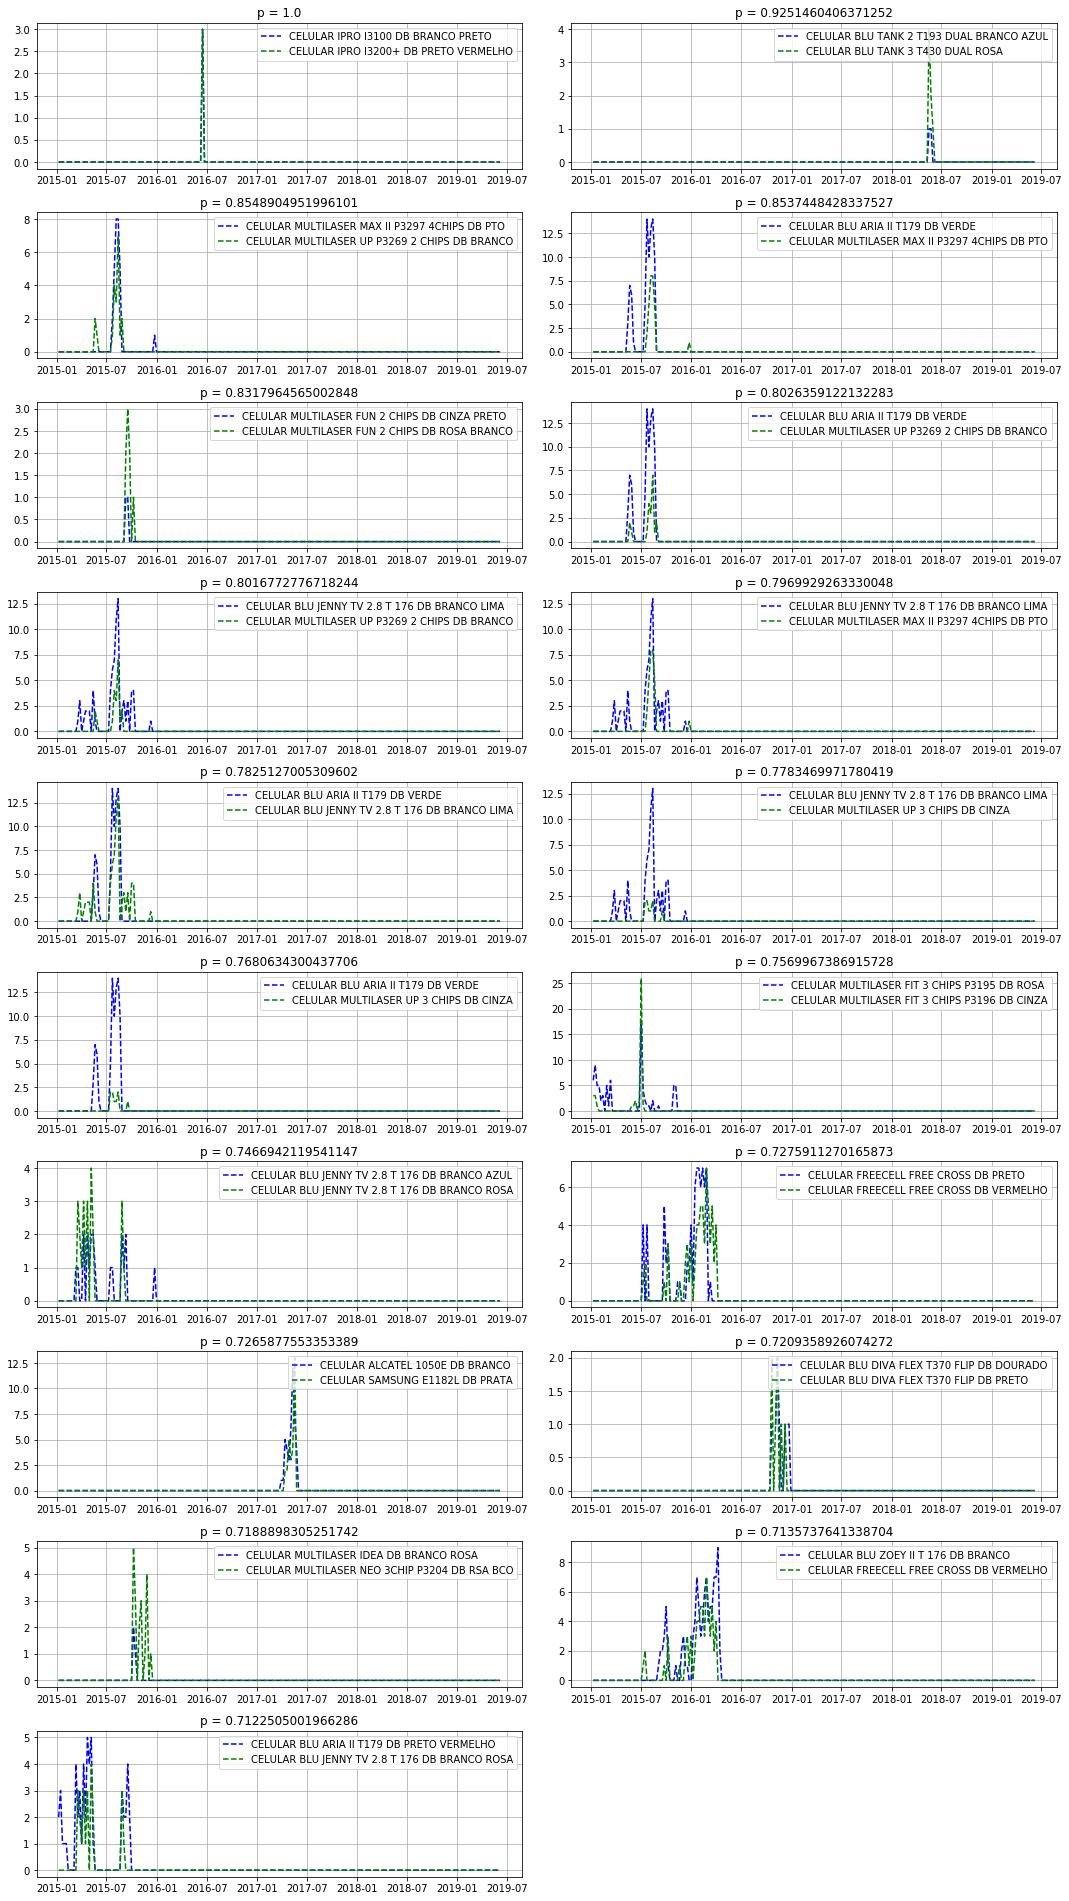

In [8]:
plt.figure(figsize=(15,50))

for i in range(19):
    plt.subplot(19, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

A análise dos gráficos mostra que o par com correlação máxima (p = 1) se deve por terem sido vendidos na mesma data, e tendo vendas apenas na mesma semana, logo dado o fato ter sido isolado, não se pode deduzir algo a mais em relação em a este par, adicionalmente, o par CELULAR BLU TANK 2 T193 DUAL BRANCO AZUL e CELULAR BLU TANK 3 T430 DUAL ROSA passa pela mesma situação.